In [ ]:
# Step 1: Loading Libraries
import pandas as pd  # data management
import numpy as np  # mathematical computation
from scipy.stats import zscore  # z-score for standardization
import seaborn as sns  # data visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # train-test split
from sklearn.linear_model import LogisticRegression  # ML algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # evaluation
import joblib  # for saving model

In [ ]:
# Step 2: Load Dataset
import kagglehub
path = kagglehub.dataset_download("shantanudhakadd/email-spam-detection-dataset-classification")
df = pd.read_csv(f"{path}/spam.csv", encoding='latin-1')  # Adjust encoding if needed
print("Sample rows of the dataset:")
print(df.head())

100%|██████████| 211k/211k [00:00<00:00, 47.6MB/s]

Extracting files...
Sample rows of the dataset:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
# Step 3: Data Summary
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())
print("\nNumber of samples and features:", df.shape)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None

Descriptive Statistics:
          v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   

                   U

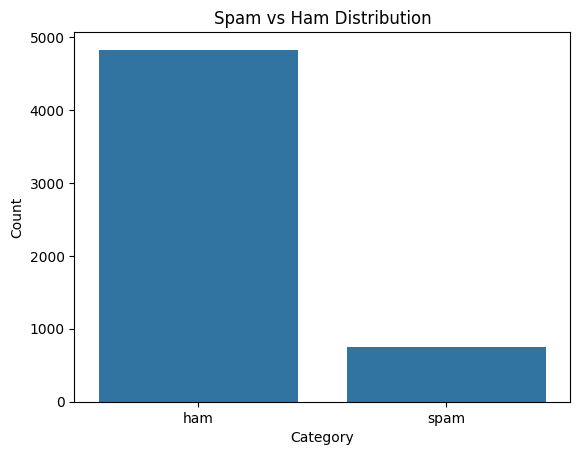

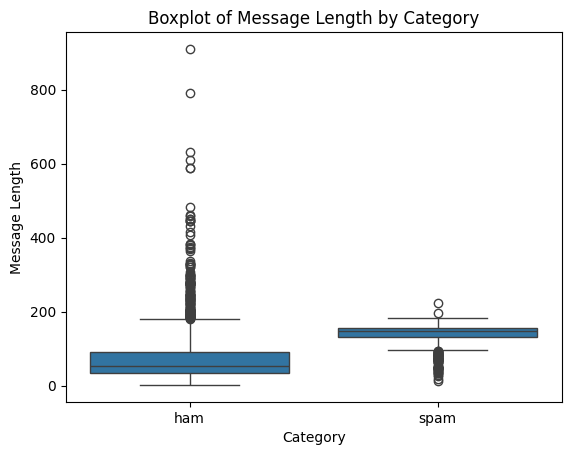

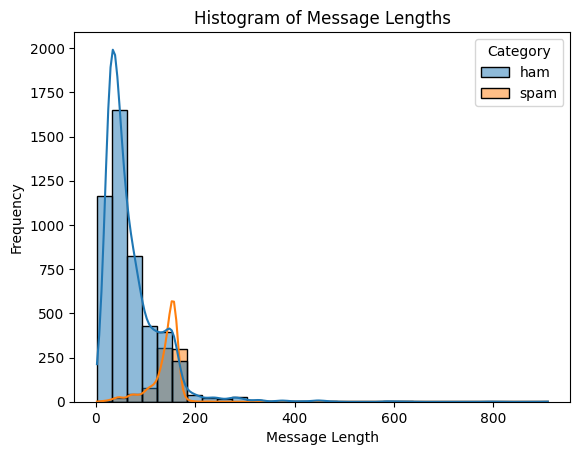

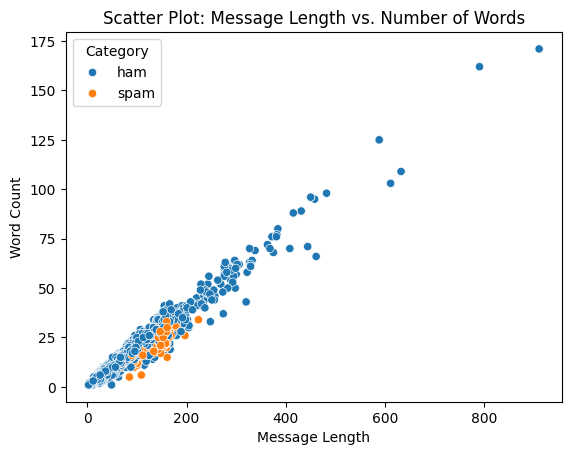

In [ ]:
# Fix column names first (do this before Step 4 if not already done)
df.columns = ['Category', 'Message'] + [f'Unused_{i}' for i in range(len(df.columns)-2)]
df = df[['Category', 'Message']]  # Drop unused columns

# Convert Category to consistent string (in case of NaN)
df = df.dropna(subset=['Category', 'Message'])

# Step 4: Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize class distribution
sns.countplot(x='Category', data=df)
plt.title("Spam vs Ham Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# Derive useful numeric features
df['Message_Length'] = df['Message'].apply(len)
df['NumWords'] = df['Message'].apply(lambda x: len(str(x).split()))

# Boxplot of message lengths
sns.boxplot(x='Category', y='Message_Length', data=df)
plt.title("Boxplot of Message Length by Category")
plt.xlabel("Category")
plt.ylabel("Message Length")
plt.show()

# Histogram of message lengths
sns.histplot(data=df, x='Message_Length', hue='Category', bins=30, kde=True)
plt.title("Histogram of Message Lengths")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()

# Scatter plot: Message Length vs. Number of Words
sns.scatterplot(x='Message_Length', y='NumWords', hue='Category', data=df)
plt.title("Scatter Plot: Message Length vs. Number of Words")
plt.xlabel("Message Length")
plt.ylabel("Word Count")
plt.show()


In [ ]:
# Step 5: Data Preprocessing
# Clean and drop unnecessary columns
df = df.rename(columns={'v1': 'Category', 'v2': 'Message'})
df = df[['Category', 'Message']]  # drop extra columns if present

# Encode the target column
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Feature extraction (convert text to numeric using TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Message'])
y = df['Category']

# Z-score standardization (not applicable directly to sparse matrix, skip or use MaxAbsScaler)
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X)


Missing Values:
 Category    0
Message     0
dtype: int64


In [ ]:
# Step 6: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 4457
Testing samples: 1115


In [ ]:
# Step 7: Choosing ML Algorithms
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier()
}

In [ ]:
# Step 8: Training and Evaluation
for name, model in models.items():
    print(f"\nTraining: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the best model
best_model = models["Random Forest"]  # or Logistic Regression if it performed better
joblib.dump(best_model, "spam_detector_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


Training: Logistic Regression
Accuracy: 0.9748878923766816
Confusion Matrix:
 [[964   1]
 [ 27 123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.82      0.90       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115


Training: Random Forest
Accuracy: 0.9775784753363229
Confusion Matrix:
 [[964   1]
 [ 24 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



['tfidf_vectorizer.pkl']

In [ ]:
# Step 9: Inferencing
def predict_message(msg):
    loaded_model = joblib.load("spam_detector_model.pkl")
    loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")
    vec_msg = loaded_vectorizer.transform([msg])
    prediction = loaded_model.predict(vec_msg)
    return "Spam" if prediction[0] == 1 else "Ham"

# Example inference
print("\nPrediction on new message:")
print(predict_message("You have won a free lottery! Call now."))



Prediction on new message:
Ham
